In [1]:
#1 Create a plot using Matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1.1 Creating numpy arrays "x" and "y" as meshgrid.
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
x, y = np.meshgrid(x, y)

In [3]:
# 1.2 Defining the function "z_func".
def z_func(x, y):
    with np.errstate(divide='ignore', invalid='ignore'):
        z = np.sin(np.sqrt(x**2 + y**2)) / np.sqrt(x**2 + y**2)
        z[np.isnan(z)] = 0  
    return z

# 1.2.1 Calculating "z" values using "x" and "y" values.
z = z_func(x, y)

Text(0, 0.5, 'Y-axis')

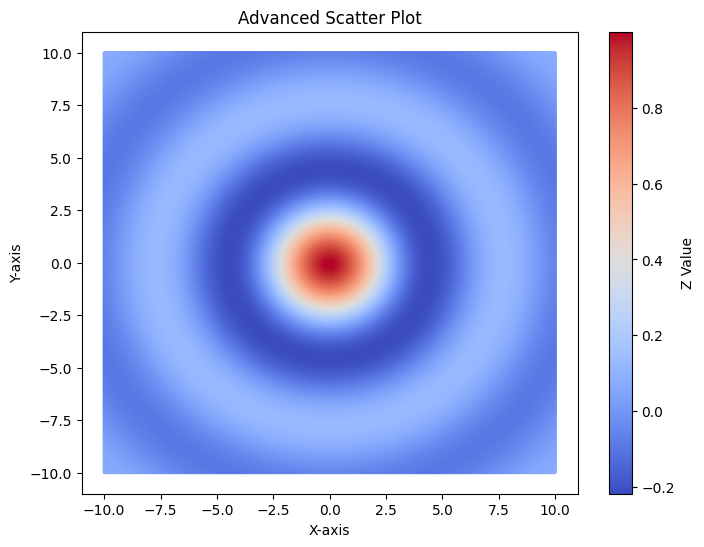

In [4]:
# 1.3 Creating a scatter plot.
fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(x, y, c=z, cmap='coolwarm', s=1)  
plt.colorbar(sc, label='Z Value')
ax.set_title('Advanced Scatter Plot')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

In [8]:
# 1.4 Saving the plot as a PNG file.
fig.savefig('advanced_scatter_plot.png', dpi=300)

In [9]:
# 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rcParams

In [10]:
# Set up the aesthetics for the plots
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 12
rcParams['axes.titlepad'] = 20
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['axes.labelsize'] = 12
rcParams['axes.titlesize'] = 14

In [11]:
# Load the dataset and process the date column
data = pd.read_csv('brexit.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%y')
date_nums = mdates.date2num(data['Date'])  # Convert dates to numerical format for regression

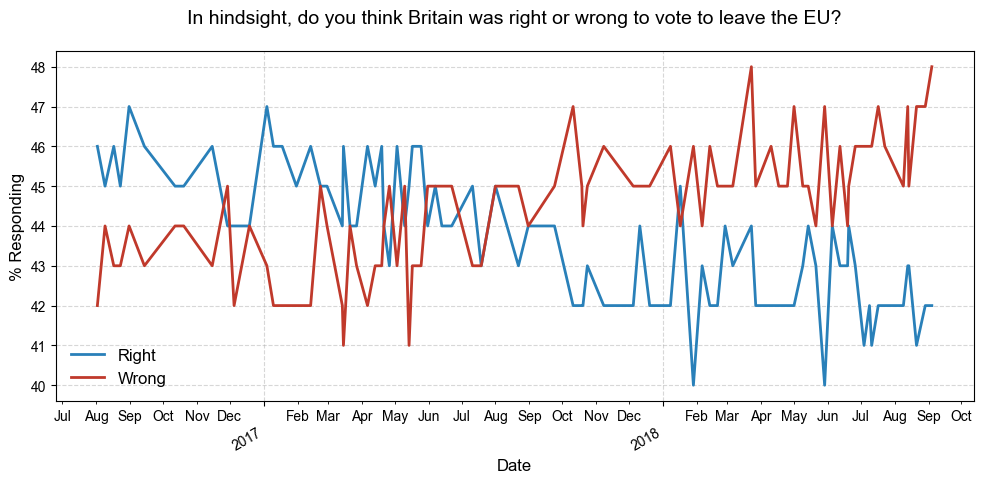

In [12]:
# Define colors for the plot lines
right_color = '#2980b9'
wrong_color = '#c0392b'

# Plotting the 'Original' graph with basic line graphs
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['% responding right'], label='Right', color=right_color, linewidth=2)
plt.plot(data['Date'], data['% responding wrong'], label='Wrong', color=wrong_color, linewidth=2)
plt.title('In hindsight, do you think Britain was right or wrong to vote to leave the EU?')
plt.xlabel('Date')
plt.ylabel('% Responding')
plt.legend(frameon=False)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('\n%Y'))
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
plt.gcf().autofmt_xdate()  # Improve readability of the date labels
plt.tight_layout()
plt.show()

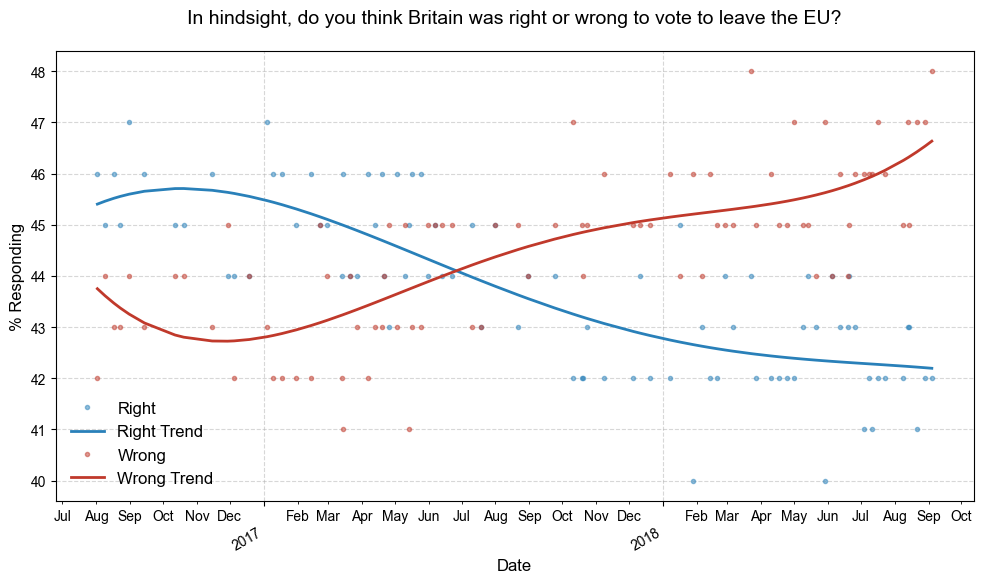

In [13]:
# Perform polynomial regression to smooth the data
degree = 4
right_fit = np.polyfit(date_nums, data['% responding right'], degree)
wrong_fit = np.polyfit(date_nums, data['% responding wrong'], degree)

# Calculate the polynomial trend lines
right_trend_poly = np.polyval(right_fit, date_nums)
wrong_trend_poly = np.polyval(wrong_fit, date_nums)

# Plotting the 'Better' graph with polynomial regression trend lines
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['% responding right'], 'o', markersize=3, alpha=0.5, label='Right', color=right_color)
plt.plot(data['Date'], right_trend_poly, label='Right Trend', color=right_color, linestyle='-', linewidth=2)
plt.plot(data['Date'], data['% responding wrong'], 'o', markersize=3, alpha=0.5, label='Wrong', color=wrong_color)
plt.plot(data['Date'], wrong_trend_poly, label='Wrong Trend', color=wrong_color, linestyle='-', linewidth=2)
plt.title('In hindsight, do you think Britain was right or wrong to vote to leave the EU?')
plt.xlabel('Date')
plt.ylabel('% Responding')
plt.legend(frameon=False)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('\n%Y'))
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
plt.gcf().autofmt_xdate()  # Improve readability of the date labels
plt.tight_layout()
plt.show()

In [ ]:
# I've created my graphs in two different styles, "Original" and "Better." To decide which one is better, I need to think about what I need.
# 
# The "Original" graph shows the data exactly as it is. In this graph, I see the data in its natural form, which can sometimes be good because it allows me to easily spot any unusual occurrences or sudden changes in the data. If I want to see the natural state of the data, this graph does the job.
# 
# On the other hand, the "Better" graph applies some processing to the data to make it smoother. In this graph, the lines passing through the data are smoother, making it easier to see general trends. This can be very useful for understanding what's happening in the long run, especially if I want to ignore fluctuations and minor changes. For instance, if I were an economics student looking to study economic trends, this type of graph would be more functional.
#  
# In conclusion, when deciding which type of graph is better, I need to think about what I need. If I want to see the true face of the data, the "Original" graph might be more suitable for me. But if I want to see general trends and the bigger picture, the "Better" graph might be more useful. Both graphs can be very useful depending on the situation, and I should consider these factors when choosing which one to use.
